In [1]:
import torch
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.tensorboard import SummaryWriter

from utils import prepare_cifar10_data, train_model, evaluate_model
from models import Autoencoder, compute_loss_autoencoder

In [2]:
batch_size = 64
learning_rate = 1e-3
num_epochs = 20
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])])
train_loader, val_loader, test_loader = prepare_cifar10_data(transform, batch_size)

In [3]:
writer = SummaryWriter(log_dir=f'runs/ae')
autoencoder_model = Autoencoder().to(device)
optimizer = optim.Adam(autoencoder_model.parameters(), lr=learning_rate)

trained_model = train_model(
    writer=writer,
    model=autoencoder_model,
    train_loader=train_loader,
    val_loader=val_loader,
    optimizer=optimizer,
    compute_loss=compute_loss_autoencoder,
    num_epochs=num_epochs,
    device=device
)

Epoch 1/20
train Loss: 1.0886
val Loss: 0.9733
Epoch 2/20
train Loss: 0.9615
val Loss: 0.9509
Epoch 3/20
train Loss: 0.9482
val Loss: 0.9416
Epoch 4/20
train Loss: 0.9420
val Loss: 0.9374
Epoch 5/20
train Loss: 0.9384
val Loss: 0.9342
Epoch 6/20
train Loss: 0.9353
val Loss: 0.9301
Epoch 7/20
train Loss: 0.9317
val Loss: 0.9280
Epoch 8/20
train Loss: 0.9300
val Loss: 0.9266
Epoch 9/20
train Loss: 0.9287
val Loss: 0.9257
Epoch 10/20
train Loss: 0.9279
val Loss: 0.9251
Epoch 11/20
train Loss: 0.9271
val Loss: 0.9242
Epoch 12/20
train Loss: 0.9265
val Loss: 0.9237
Epoch 13/20
train Loss: 0.9260
val Loss: 0.9233
Epoch 14/20
train Loss: 0.9254
val Loss: 0.9225
Epoch 15/20
train Loss: 0.9247
val Loss: 0.9217
Epoch 16/20
train Loss: 0.9241
val Loss: 0.9216
Epoch 17/20
train Loss: 0.9236
val Loss: 0.9208
Epoch 18/20
train Loss: 0.9231
val Loss: 0.9207
Epoch 19/20
train Loss: 0.9225
val Loss: 0.9196
Epoch 20/20
train Loss: 0.9217
val Loss: 0.9198


In [4]:
test_loss = evaluate_model(
    writer=writer,
    model=trained_model,
    test_loader=test_loader,
    compute_loss=compute_loss_autoencoder,
    device=device
)

Test Loss: 0.9079


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1770618..2.6952004].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.4290657..2.5976489].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.351526..2.6952004].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.7692488..2.3440151].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.2933714..1.908451].


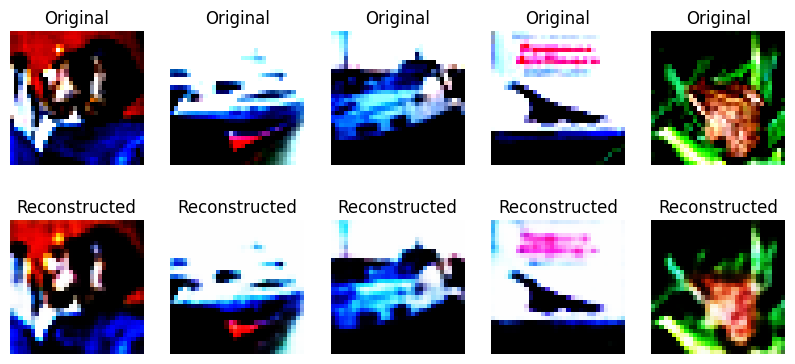

In [5]:
import matplotlib.pyplot as plt 

trained_model.eval()  # Set model to evaluation mode

# Visualization
dataiter = iter(test_loader)
images, _ = next(dataiter)
images = images.to(device)

with torch.no_grad():
    reconstructed = trained_model(images)

images = images.cpu()
reconstructed = reconstructed.cpu()
n_visualize = 5

plt.figure(figsize=(10, 4.5))
for i in range(n_visualize):
    # Original images
    ax = plt.subplot(2, n_visualize, i + 1)
    plt.imshow(images[i].permute(1, 2, 0))
    plt.title("Original")
    plt.axis('off')

    # Reconstructed images
    ax = plt.subplot(2, n_visualize, i + 1 + n_visualize)
    plt.imshow(reconstructed[i].permute(1, 2, 0))
    plt.title("Reconstructed")
    plt.axis('off')

plt.show()